## Polish Companies Bankruptcy

### - _Ankur Patel_

In [117]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s.yimg.com/ny/api/res/1.2/vQGqpL_guzGrlKkOeXz8Qg--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/https://media.zenfs.com/en-US/homerun/motleyfool.com/8c3d0a8777ac8a399c78bad86ee74b39", width=600, height=200)

### Introduction:
The Polish Companies Bankruptcy Data Set (http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data) will be used for building a classification model to predict companies that will bankrupt. Visit the link for the details of this dataset.

Algorithms: 

- Logistic Regression
- Linear SVM
- Decision Tree
- Random Forest

In [1]:
# to read the zip file
from zipfile import ZipFile 
  
# specifying the zip file name 
data = "data.zip"
  
# opening the zip file in READ mode 
with ZipFile(data, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
    zip.extractall() 
    zips = zip.namelist()  

File Name                                             Modified             Size
1year.arff                                     2016-04-11 08:38:14      3432892
2year.arff                                     2016-04-11 08:38:14      4987459
3year.arff                                     2016-04-11 08:38:16      5169674
4year.arff                                     2016-04-11 08:38:16      4829865
5year.arff                                     2016-04-11 08:38:16      2899490


In [2]:
# importing libraries
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from termcolor import colored
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
# extract from each arff file
data1= []
for i,j in enumerate(zips):
    data = arff.loadarff(zips[i])
    data1.append(pd.DataFrame(data[0]))

In [74]:
# brief view of the year 1, 2, and 3 
print(colored("Year 1:\n", "red"), data1[0].head(), colored("\nlength:", "blue"), len(data1[0]),
      colored("\n\nYear 2:\n", "red"), data1[1].head(), colored("\nlength:", "blue"), len(data1[1]),
      colored("\n\nYear 3:\n", "red"), data1[2].head(), colored("\nlength:", "blue"), len(data1[2]))

Year 1:
       Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7    Attr8  \
0  0.200550  0.37951  0.39641  2.0472  32.3510  0.38825  0.249760  1.33050   
1  0.209120  0.49988  0.47225  1.9447  14.7860  0.00000  0.258340  0.99601   
2  0.248660  0.69592  0.26713  1.5548  -1.1523  0.00000  0.309060  0.43695   
3  0.081483  0.30734  0.45879  2.4928  51.9520  0.14988  0.092704  1.86610   
4  0.187320  0.61323  0.22960  1.4063  -7.3128  0.18732  0.187320  0.63070   

    Attr9   Attr10  ...    Attr56   Attr57   Attr58    Attr59  Attr60  Attr61  \
0  1.1389  0.50494  ...  0.121960  0.39718  0.87804  0.001924  8.4160  5.1372   
1  1.6996  0.49788  ...  0.121300  0.42002  0.85300  0.000000  4.1486  3.2732   
2  1.3090  0.30408  ...  0.241140  0.81774  0.76599  0.694840  4.9909  3.9510   
3  1.0571  0.57353  ...  0.054015  0.14207  0.94598  0.000000  4.5746  3.6147   
4  1.1559  0.38677  ...  0.134850  0.48431  0.86515  0.124440  6.3985  4.3158   

    Attr62  Attr63   Attr64  class 

In [35]:
# concatenate years 1,2,3
df = pd.concat([data1[0], data1[1], data1[2]])
print("Data size:", df.shape)

Data size: (27703, 65)


In [36]:
# the only column whose values are extremely high, so better to drop it
print(df["Attr55"].head())
df["Attr55"] = None

0    348690.0
1      2304.6
2      6332.7
3     20545.0
4      3186.6
Name: Attr55, dtype: float64


In [32]:
# rearrange target column
print("Null values in class:", df['class'].isnull().sum())
df.rename(columns={'class':'target'}, inplace=True)
df.replace({'target': b'1'}, int(1), inplace=True)
df.replace({'target': b'0'}, int(0), inplace=True)
print(df['target'].value_counts())

Null values in class: 0
0    26537
1     1166
Name: target, dtype: int64


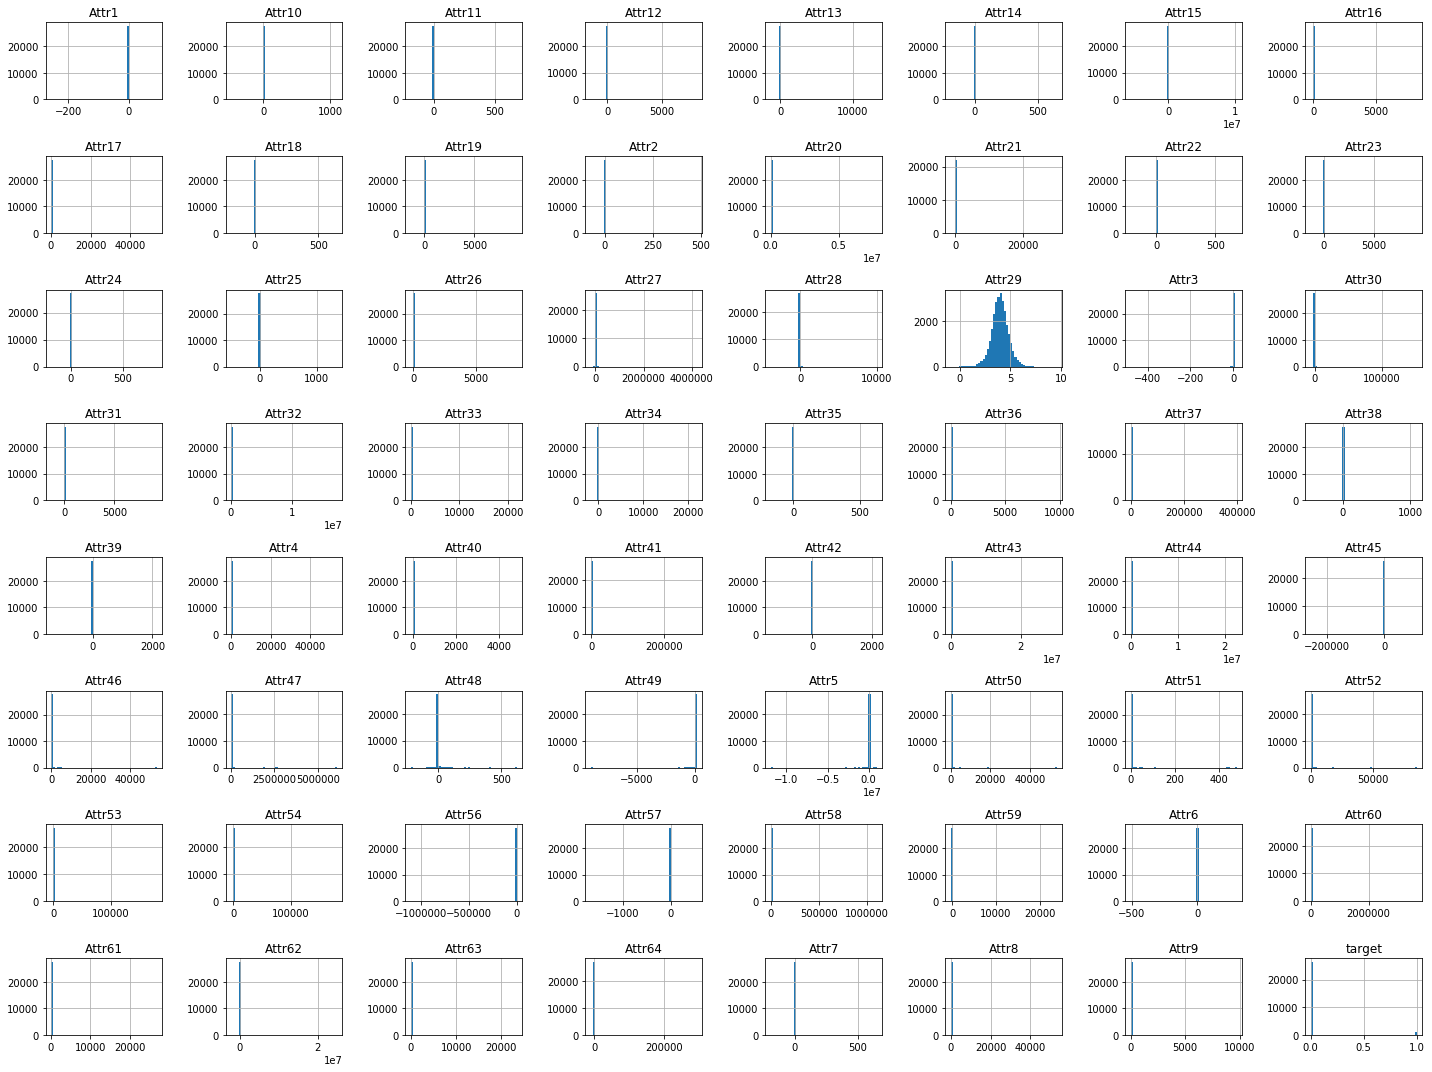

In [33]:
# to view distribution
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()    
plt.show()

In [19]:
# splitting into df and target
target = df.iloc[:, -1]
df = df.drop(df.columns[-1], axis=1)

In [20]:
# the data must be preprocessed (remove duplicates and null values with 50 null required, 
# and then to use Imputation transformer for completing missing values)
imr=Imputer(missing_values='NaN', strategy='median', axis=0)
imr=imr.fit(df)
imputed=imr.transform(df.values)
df=pd.DataFrame(pd.DataFrame(imputed).values,columns=["Attr1","Attr2","Attr3","Attr4","Attr5","Attr6","Attr7","Attr8",
                                                "Attr9","Attr10","Attr11","Attr12","Attr13","Attr14","Attr15","Attr16",
                                                "Attr17","Attr18","Attr19","Attr20","Attr21","Attr22","Attr23","Attr24",
                                                "Attr25","Attr26","Attr27","Attr28","Attr29","Attr30","Attr31","Attr32",
                                                "Attr33","Attr34","Attr35","Attr36","Attr37","Attr38","Attr39","Attr40",
                                                "Attr41","Attr42","Attr43","Attr44","Attr45","Attr46","Attr47","Attr48",
                                                "Attr49","Attr50","Attr51","Attr52","Attr53","Attr54","Attr55","Attr56",
                                                "Attr57","Attr58","Attr59","Attr60","Attr61","Attr62","Attr63","Attr64"])

In [21]:
# splitting into train-test
seed = 42 #memory location for all methods
X, y = df, target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed) 
print("Original dataset:", len(X_train), "train +", len(X_test), "test")

Original dataset: 22162 train + 5541 test


In [77]:
# other option to decorate the text
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [79]:
# StandardScaler
X_sc = pd.DataFrame(StandardScaler().fit_transform(X_train))
print(color.BOLD+"After scaling: \n"+color.END, X_sc.head())

After scaling: 
          0         1         2         3         4         5         6   \
0 -0.009919 -0.040815  0.015552 -0.049748  0.008922  0.010280 -0.019611   
1  0.083552 -0.099216  0.103489  0.303825  0.012503  0.107126  0.008571   
2 -0.004570  0.047077 -0.056525 -0.075919  0.007928  0.010280 -0.016897   
3 -0.123384  0.063264 -0.043736 -0.073388  0.009365  0.008845 -0.055874   
4  0.020391  0.000477  0.009987 -0.062376  0.009115  0.062168 -0.005647   

         7         8         9   ...        54        55        56        57  \
0 -0.022954 -0.025938 -0.003328  ... -0.107389  0.006853  0.000923 -0.007612   
1  0.024262 -0.026393  0.016307  ... -0.033344  0.006850  0.015226 -0.007608   
2 -0.027522 -0.014807 -0.032890  ... -0.120082  0.006831  0.018272 -0.007583   
3 -0.027856  0.002672 -0.038334  ... -0.108266  0.006956 -0.184418 -0.007713   
4 -0.026012  0.005283 -0.017216  ... -0.095513  0.006827  0.015059 -0.007584   

         58        59        60        61        62

In [13]:
# MinMaxScaler
X_scaled =  pd.DataFrame(MinMaxScaler().fit_transform(X))
print(color.BOLD+"After scaling: \n"+color.END, X_scaled.head())

After scaling: 
          0         1         2         3         4         5         6   \
0  0.732097  0.131149  0.965215  0.000038  0.923152  0.626537  0.226290   
1  0.732122  0.131367  0.965367  0.000036  0.923151  0.626059  0.226300   
2  0.732234  0.131721  0.964955  0.000029  0.923150  0.626059  0.226361   
3  0.731758  0.131019  0.965340  0.000047  0.923154  0.626244  0.226103   
4  0.732059  0.131572  0.964879  0.000026  0.923149  0.626290  0.226216   

         7         8         9   ...        54        55        56       57  \
0  0.002664  0.000242  0.304174  ...  0.347200  0.999736  0.751235  0.00018   
1  0.002658  0.000299  0.304169  ...  0.291364  0.999736  0.751246  0.00018   
2  0.002648  0.000259  0.304046  ...  0.292013  0.999736  0.751425  0.00018   
3  0.002674  0.000233  0.304217  ...  0.294304  0.999736  0.751120  0.00018   
4  0.002651  0.000243  0.304099  ...  0.291506  0.999736  0.751274  0.00018   

         58        59        60        61        62      

In [48]:
# scaled train-test split
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=seed)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed)
print(len(X_train_sc), "train +", len(X_test_sc))

22162 train + 5541


### Review (1)

The data of year 1, 2, 3 have been concatenated and then scaled using Standard and MinMax. The dataset was split into train and test for each conditions and they will be compared after.

- unscaled
- StandardScaler
- MinMaxScaler

The target column is very unproportional since there are about 26000 0's while only about 1100 1's. Although, it makes sense with this data since it's of bankruptcy.

In [68]:
# classifiers for predicting model
classifier_namess = ["Logistic Regression", "Linear SVM", "Decision Tree", "Random Forest"]
classifiers = [LogisticRegression(), LinearSVC(), DecisionTreeClassifier(), RandomForestClassifier()]    

In [53]:
# unscaled scores
cross_val_scores = []
for classifier in classifiers:
    classifier_names = classifier.fit(X_train, y_train) #fit trains the model
    scores = cross_val_score(classifier, X_train, y_train, cv=10) #10-fold cv
    cross_val_scores.append(np.mean(scores))
print("Classifiers:", classifier_namess)
print("Cross-Validation:", cross_val_scores)

Classifiers: ['Logistic Regression', 'Linear SVM', 'Decision Tree', 'Random Forest']
Cross-Validation: [0.945357615226482, 0.8970821407734814, 0.9525309760103285, 0.9629999663995943]


In [56]:
# Bagging of the classifiers (unscaled)
for i, classifier in enumerate(classifiers):
    bg = BaggingClassifier(classifier, max_samples=0.5, max_features=1.0, n_estimators=20, random_state=seed)
    bg.fit(X_train, y_train)
    print("Bagging of {}".format(classifier_namess[i]), bg.score(X_test, y_test))

Bagging of Logistic Regression 0.9518137520303195
Bagging of Linear SVM 0.9474824038982134
Bagging of Decision Tree 0.971304818624797
Bagging of Random Forest 0.9626421223605848


In [66]:
# StandardScaler scores
cross_val_scoress = []
for classifier in classifiers:
    classifier_names = classifier.fit(X_train_sc, y_train) #fit trains the model
    scores = cross_val_score(classifier, X_train_sc, y_train, cv=10) #10-fold cv
    cross_val_scoress.append(np.mean(scores))
print("Classifiers:", classifier_namess)
print("Cross-Validation:", cross_val_scoress)

Classifiers: ['Logistic Regression', 'Linear SVM', 'Decision Tree', 'Random Forest']
Cross-Validation: [0.9570887997629646, 0.9569986284925329, 0.9503640553042313, 0.9627288823995986]


In [58]:
# Bagging of the classifiers (StandardScaler)
for i, classifier in enumerate(classifiers):
    bg = BaggingClassifier(classifier, max_samples=0.5, max_features=1.0, n_estimators=20, random_state=seed)
    bg.fit(X_train_sc, y_train)
    print("Bagging of {}".format(classifier_namess[i]), bg.score(X_test_sc, y_test))

Bagging of Logistic Regression 0.9581303013896408
Bagging of Linear SVM 0.9577693557119653
Bagging of Decision Tree 0.9698610359140949
Bagging of Random Forest 0.962461649521747


In [67]:
# MinMaxScaler scores
cross_val_scoresss = []
for classifier in classifiers:
    classifier_names = classifier.fit(X_train_scaled, y_train) #fit trains the model
    scores = cross_val_score(classifier, X_train_scaled, y_train, cv=10) #10-fold cv
    cross_val_scoresss.append(np.mean(scores))
print("Classifiers:", classifier_namess)
print("Cross-Validation:", cross_val_scoresss)

Classifiers: ['Logistic Regression', 'Linear SVM', 'Decision Tree', 'Random Forest']
Cross-Validation: [0.9577205281169212, 0.9577656341160191, 0.930375988539207, 0.9557798297783086]


In [96]:
# Bagging of the classifiers (MinMaxScaler)
for i, classifier in enumerate(classifiers):
    bg = BaggingClassifier(classifier, max_samples=0.5, max_features=1.0, n_estimators=10, random_state=seed)
    bg.fit(X_train_scaled, y_train)
    print("Bagging of {}".format(classifier_namess[i]), bg.score(X_test_scaled, y_test))

Bagging of Logistic Regression 0.9584912470673164
Bagging of Linear SVM 0.9584912470673164
Bagging of Decision Tree 0.9574084100342899
Bagging of Random Forest 0.9579498285508031


### Review (2)

The scores of each classifier can be seen above. Highest scores:
- Unscaled: Random Forest 96.3%
    - __Bagging of Decision Tree 97.13%__
- StandardScaler: Random Rorest 96.24%
    - __Bagging of Decision Tree 96.99%__
- MinMaxScaler: Linear SVM 96.24%
    - Bagging of Random Forest 95.92% (they were all around 95.8%)
    
Bagging ensemble increased the scores for most. The best method tested for this dataset is Bagging of DecisionTree unscaled with cv of 10-fold with an accuracy of 97.13%, and the next best was Bagging of DecisionTree StandardScaler with an accuracy of 96.99%. Most of the scores were were above 95%.

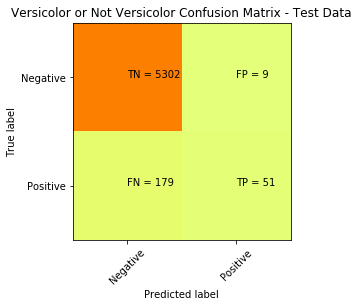

In [110]:
cm = confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [108]:
param_grid_dt = {"max_depth" : [1, 5, 10, 15, 20, 25, 30],
                 "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}
# create and fit a ridge regression model, testing each alpha
model = DecisionTreeClassifier()
grid = model_selection.GridSearchCV(estimator=model, param_grid=param_grid_dt)
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10]}

In [115]:
# unscaled Decision Tree with Bagging
# Bagging of the classifiers (unscaled)
bg = BaggingClassifier(DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), 
                       max_samples=0.5, max_features=1.0, n_estimators=20, random_state=seed)
bg.fit(X_train, y_train)
print("Bagging of DeicionTreeClassifier after GridSearchCV:", bg.score(X_test, y_test))

Bagging of DeicionTreeClassifier after GridSearchCV: 0.9711243457859592


### Conclusion (1):

The best model found for predicting bankruptcy was BaggingClassifier with DecisionTreeClassifier with the unscaled data, which resulted in a score of 97.13%. The default DecisionTree was used first for the different classifiers and then Bagging. The GridSearchCV was additionally used at the end to compare/test. It gave the optimal parameters, but the score was 97.11% which was very similar to default parameters.

## AutoML: Automatic Machine Learning

In [121]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i0.wp.com/softwareengineeringdaily.com/wp-content/uploads/2019/05/image7-1.png?fit=469%2C235&ssl=1", width=600, height=200)

- H2O is a Java-based software for data modeling and general computing
- The goal of H2O is to allow simple horizontal scaling to a given problem in order to produce a solution faster
- The conceptual paradigm MapReduce (AKA “divide and conquer and combine”), along with a good concurrent application structure, (c.f. jsr166y and NonBlockingHashMap) enable this type of scaling in H2O

**AutoML is a technique widely used by companies now for efficiency**

_Reference: http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/intro.html_

In [4]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\ankur\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ankur\AppData\Local\Temp\tmpkcd7pwd4
  JVM stdout: C:\Users\ankur\AppData\Local\Temp\tmpkcd7pwd4\h2o_ankur_started_from_python.out
  JVM stderr: C:\Users\ankur\AppData\Local\Temp\tmpkcd7pwd4\h2o_ankur_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,-05:00
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.6
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_ankur_85pcdc
H2O cluster total nodes:,1
H2O cluster free memory:,3.528 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [ ]:
h2o.demo("glm")


-------------------------------------------------------------------------------
Demo of H2O's Generalized Linear Estimator.

This demo uploads a dataset to h2o, parses it, and shows a description.
Then it divides the dataset into training and test sets, builds a GLM
from the training set, and makes predictions for the test set.
Finally, default performance metrics are displayed.
-------------------------------------------------------------------------------

>>> # Connect to H2O
>>> h2o.init()

(press any key)

In [5]:
# concanetate all 5 years and preprocess same as earlier
df = pd.concat([data1[0], data1[1], data1[2], data1[3], data1[4]])
print("Data size:", df.shape)
cont_names = df.columns[:-1]
df.rename(columns={'class':'target'}, inplace=True)
df.replace({'target': b'1'}, int(1), inplace=True)
df.replace({'target': b'0'}, int(0), inplace=True)
df['Attr55'] = None

# split again
X_train, X_test, y_train, y_test = train_test_split(df[cont_names], df['target'], test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], 1)
test = pd.concat([X_test, y_test], 1)

Data size: (43405, 65)


In [6]:
df = h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
df['target'] = df['target'].asfactor()
y = "target"
cont_names = cont_names.tolist()
x = cont_names

In [8]:
# max_runtime_secs= 3600, sort_metric='AUC'
aml = H2OAutoML(max_runtime_secs= 3600*6, max_models=60, sort_metric='AUC')
aml.train(x = x, y = y, training_frame = df)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [9]:
# entire leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20191018_010439,0.948751,0.0972429,0.216458,0.154564,0.02389
GBM_5_AutoML_20191018_010439,0.946161,0.0942537,0.215193,0.158331,0.0250687
GBM_4_AutoML_20191018_010439,0.946021,0.0936558,0.215576,0.156588,0.0245199
GBM_grid_1_AutoML_20191018_010439_model_1,0.944657,0.0946913,0.215989,0.156215,0.0244031
StackedEnsemble_BestOfFamily_AutoML_20191018_010439,0.943432,0.104968,0.226863,0.161392,0.0260473
GBM_grid_1_AutoML_20191018_010439_model_7,0.942182,0.10055,0.231349,0.162314,0.0263457
GBM_3_AutoML_20191018_010439,0.941153,0.0943815,0.234808,0.156434,0.0244716
GBM_grid_1_AutoML_20191018_010439_model_24,0.939322,0.105565,0.227787,0.167913,0.0281946
GBM_grid_1_AutoML_20191018_010439_model_17,0.936824,0.103113,0.243774,0.165732,0.0274672
GBM_2_AutoML_20191018_010439,0.935992,0.0976685,0.236548,0.158774,0.0252091


In [10]:
hf = h2o.H2OFrame(test)
preds = aml.predict(hf)
preds = preds.as_data_frame()
preds['p_p0'] = np.exp(preds['p0'])
preds['p_p1'] = np.exp(preds['p1'])
preds['sm'] = preds['p_p1'] / (preds['p_p0'] + preds['p_p1'])

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, preds['sm'])

0.9500382515465734

### Conclusion (2):

The H2O module being used has an AutoML workflow to automatically train and tune several models and provide us the statistical results. The workflow parameters were chosen as (max_runtime_secs= 3600* 6, max_models=60, sort_metric='AUC') to get these results. Like always, tuning this depends on the computer power but this shows a good idea.